# Analyse des données relatives à l'addiction aux réseaux sociaux par les élèves 

## 1: Chargement des données de students_social_media_addiction.csv

In [21]:
import pandas as pd 
df= pd.read_csv("students_social_media_addiction.csv")
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [ ]:
df.head(5)

: 

# 2 : Types de variables, valeurs min et max

 ### * Les variables et leur type sont:

***student_ID(int),***  

***Age(int)***,

***Gender(obj)***,

***Academic_Level(obj),***

***Country(obj),***

***Avg_Daily_Usage_Hours(float),***

***Most_Used_Plateform(obj),***

***Affect_Academic_Performance(obj),*** 

***Sleep_Hours_Per_Night(float),***

***Mental_Health_Score(int),***

***Relationship_Status(obj),***

***Conflicts_Over_Social_Media(int),***

***Addicted_score(int)***


  ### * Il n'y a pas de variables manquantes.
 ### * Valeur maximales:

 Student_ID : 705
 
 Age : 24
 
 Avg_Daily_Usage_Hours : 8.5
 
 Sleep_Hours_Per_Night : 9.6
 
 Mental_Health_Score : 9
 
 Conflicts_Over_Social_Media : 5
 
 Addicted_Score : 9

### * Valeurs minimales :

Student_ID : 1

Age : 18

Avg_Daily_Usage_Hours : 1.0

Sleep_Hours_Per_Night : 3.0

Mental_Health_Score : 2

Conflicts_Over_Social_Media : 0

Addicted_Score : 2
 

# 3 : Extraction de données en variables


In [23]:
age_des_eleves= df["Age"]
niveau_addiction=df["Addicted_Score"]

# 4.a : plateforme la plus utilisée

In [24]:
# définir la variable plateforme la plus utilisée
col_name = [col for col in df.columns if col.lower().replace('é','e').replace('è','e').replace('ê','e') in ["most_used_plateform","most_used_platform"]][0]
plateforme_plus_utilise = df[col_name].mode()[0]
print("La plateforme la plus utilisée est :", plateforme_plus_utilise)

La plateforme la plus utilisée est : Instagram


# 4.b : plateforme la plus utilisée par pays

In [25]:
def plateforme_plus_utilisee_pays(df, pays):
    """Retourne la plateforme la plus utilisée pour un pays donné."""
    col_plateforme = [col for col in df.columns if col.lower().replace('é','e').replace('è','e').replace('ê','e') in ["most_used_plateform","most_used_platform"]][0]
    # Filtrer le DataFrame pour le pays donné
    df_pays = df[df["Country"].str.lower() == pays.lower()]
    if df_pays.empty:
        return f"Aucune donnée pour le pays : {pays}"
    return df_pays[col_plateforme].mode()[0]

# Exemple d'utilisation pour les USA et l'Inde
print("Plateforme la plus utilisée aux USA :", plateforme_plus_utilisee_pays(df, "USA"))
print("Plateforme la plus utilisée en Inde :", plateforme_plus_utilisee_pays(df, "India"))          
print("plateforme la plus utilisée  au togo:", plateforme_plus_utilisee_pays(df, "Togo"))

Plateforme la plus utilisée aux USA : Instagram
Plateforme la plus utilisée en Inde : WhatsApp
plateforme la plus utilisée  au togo: Aucune donnée pour le pays : Togo


# DIAGRAMMME 

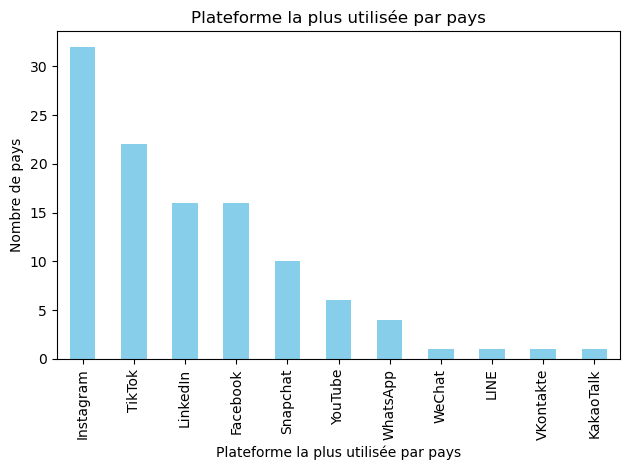

In [26]:
import matplotlib.pyplot as plt
# Trouver la plateforme la plus utilisée par pays
platform_by_country = df.groupby("Country")["Most_Used_Platform"].agg(lambda x: x.mode()[0])
counts = platform_by_country.value_counts()
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Plateforme la plus utilisée par pays')
plt.ylabel('Nombre de pays')
plt.title('Plateforme la plus utilisée par pays')
plt.tight_layout()
plt.show()

# 4.c : Nombre d'utilisateurs par plateforme

In [27]:
nombre_d_utilisateurs_par_plateforme = df["Most_Used_Platform"].value_counts()
print(f"Nombre d'utilisateurs par plateforme :", nombre_d_utilisateurs_par_plateforme)

Nombre d'utilisateurs par plateforme : Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


# 4.d : Plateformes qui ont des effets sur les résultats des élèves en inde


In [28]:
# Plateformes qui ont des effets sur les résultats des élèves en Inde
valeurs_positives = ["oui", "yes", "true", "1"]
df_inde = df[df["Country"].str.lower() == "india"]
plateformes_effet_inde = df_inde[df_inde["Affects_Academic_Performance"].astype(str).str.lower().isin(valeurs_positives)]
resultats_inde = plateformes_effet_inde["Most_Used_Platform"].value_counts()
print("Plateformes qui ont des effets sur les résultats des élèves en Inde :")
print(resultats_inde)


Plateformes qui ont des effets sur les résultats des élèves en Inde :
Most_Used_Platform
WhatsApp     25
Instagram     9
TikTok        5
Facebook      3
Name: count, dtype: int64


# 5 : Comparaison de l'addiction des filles à celle des garçons

In [ ]:
# Comparaison de l'addiction des filles à celle des garçons
addiction_filles = df[df["Gender"].str.lower() == "female"]["Addicted_Score"]
addiction_garcons = df[df["Gender"].str.lower() == "male"]["Addicted_Score"]
print("Moyenne du score d'addiction chez les filles :", addiction_filles.mean())µ
print("Moyenne du score d'addiction chez les garçons :", addiction_garcons.mean())

Moyenne du score d'addiction chez les filles : 6.515580736543909


# 6 : Age d'addiction la plus forte

In [30]:
# Age d'addiction la plus forte
score_max = df["Addicted_Score"].max()
ages_max_addiction = df[df["Addicted_Score"] == score_max]["Age"]
print(f"Âge moyen pour le score d'addiction maximal : {ages_max_addiction.mean():.2f}")

Âge moyen pour le score d'addiction maximal : 19.64


# CONCLUSION:
L'addiction  aux réseaux sociaux est plus forte entre 19 et 20 ans.